<a href="https://colab.research.google.com/github/DaanMoura/AprendizadoDeMaquina/blob/main/trabalho2/AM_Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.morphology import skeletonize
from sklearn.metrics.cluster import adjusted_rand_score

import secrets
from prettytable import PrettyTable

In [10]:
numbers_df = pd.read_csv("https://media.githubusercontent.com/media/DaanMoura/AprendizadoDeMaquina/main/trabalho2/data/numbers.csv")

In [11]:
numbers_df.tail(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
69980,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,87,253,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,253,110,0,0,0,0,0,0,0.0
69981,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69982,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69983,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69984,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69985,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69987,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69989,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [12]:
labels = numbers_df['label']
labels_true = labels.to_numpy()

In [13]:
numbers_df.drop(['label'], axis=1, inplace=True)

In [14]:
numbers_df['pixel783'] = 0
numbers = numbers_df.to_numpy()
len(numbers)

70000

#Função para transformar imagens em binario

In [15]:
def to_binary(image):
  out = image.copy()
  for i in range(len(image)):
    if (image[i] > 0):
        out[i] = 1
    else:
        out[i] = 0
  return out
      

#Kmeans utilizando o dataset normal

In [53]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(numbers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [51]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])
k = {}
z = {}
numbers_labeled = {}
for i in range (0, 10):
  k[i] = []
  z[i] = []
  numbers_labeled[i] = []
for i in range(0, 70000):
  numbers_labeled[kmeans.labels_[i]].append(numbers[i])
  k[kmeans.labels_[i]].append(reduced_data[i][0])
  z[kmeans.labels_[i]].append(reduced_data[i][1])


In [ ]:
for i in range (0,10):
  plt.plot(k[i],z[i],'o')
plt.plot(x,y,'x', color = 'black') 

In [54]:
adjusted_rand_score(labels_true,kmeans.labels_)

0.0785729114072706

#Kmeans utilizando o dataset com imagens transformadas em binario

In [55]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = to_binary(numbers[i]).reshape(28,28).reshape(784)

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000
passando por  50000
passando por  60000


In [56]:
reduced_data_bin = bin_numbers
kmeans_bin = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans_bin.fit(reduced_data_bin)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
#bin
x_bin = []
y_bin = []
for i in kmeans_bin.cluster_centers_:
  x_bin.append(i[0])
  y_bin.append(i[1])
k_bin = {}
z_bin = {}
numbers_labeled_bin = {}
for i in range (0, 10):
  k_bin[i] = []
  z_bin[i] = []
  numbers_labeled_bin[i] = []
for i in range(0, 70000):
  
  numbers_labeled_bin[kmeans_bin.labels_[i]].append(bin_numbers[i])
  k_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][0])
  z_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][1])

In [57]:
adjusted_rand_score(labels_true,kmeans_bin.labels_)

0.09067726123550628

#Kmeans utilizando dataset com imagens esqueletizadas

In [58]:
bin_numbers_esk = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers_esk[i] = skeletonize(to_binary(numbers[i]).reshape(28,28)).reshape(784)

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000
passando por  50000
passando por  60000


In [59]:
kmeans_bin_esk = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans_bin_esk.fit(bin_numbers_esk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [45]:
x_bin_esk = []
y_bin_esk = []
for i in kmeans_bin_esk.cluster_centers_:
  x_bin_esk.append(i[0])
  y_bin_esk.append(i[1])
k_bin_esk = {}
z_bin_esk = {}
numbers_labeled_bin_esk = {}
for i in range (0, 10):
  k_bin_esk[i] = []
  z_bin_esk[i] = []
  numbers_labeled_bin_esk[i] = []
for i in range(0, 70000):
  
  numbers_labeled_bin_esk[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i])
  k_bin[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i][0])
  z_bin[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i][1])

In [60]:
adjusted_rand_score(labels_true,kmeans_bin_esk.labels_)

0.04748926508085884

#Kmeans utilizando dataset normal com o uso do PCA

In [61]:
reduced_data = PCA(n_components=2).fit_transform(numbers)
print(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

[[ 7.67614441e+02 -4.03951530e+01]
 [ 1.13605172e+03 -6.21953281e-01]
 [-4.98305227e+02  1.09933787e+01]
 ...
 [ 4.67069725e+02  8.97842167e+02]
 [ 2.91861005e+02 -1.80289256e-01]
 [-3.21553524e+02  4.49526118e+02]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])
k = {}
z = {}
numbers_labeled = {}
for i in range (0, 10):
  k[i] = []
  z[i] = []
  numbers_labeled[i] = []
for i in range(0, 70000):
  numbers_labeled[kmeans.labels_[i]].append(numbers[i])
  k[kmeans.labels_[i]].append(reduced_data[i][0])
  z[kmeans.labels_[i]].append(reduced_data[i][1])


In [ ]:
for i in range (0,10):
  plt.plot(k[i],z[i],'o')
plt.plot(x,y,'x', color = 'black') 

In [62]:
adjusted_rand_score(labels_true,kmeans.labels_)

0.043915364596901596

In [ ]:
plt.imshow(bin_numbers[2310].reshape(28,28), cmap = 'gray')

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(70000)))].reshape(28,28), cmap = 'gray')

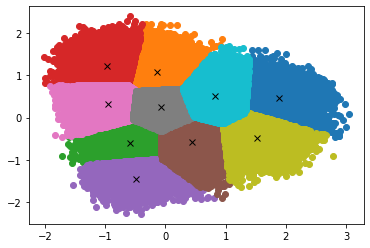

In [ ]:
#bin
for i in range (0,10):
  plt.plot(k_bin[i],z_bin[i],'o')
plt.plot(x_bin,y_bin,'x', color = 'black') 

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(5000)))].reshape(28,28), cmap = 'gray')

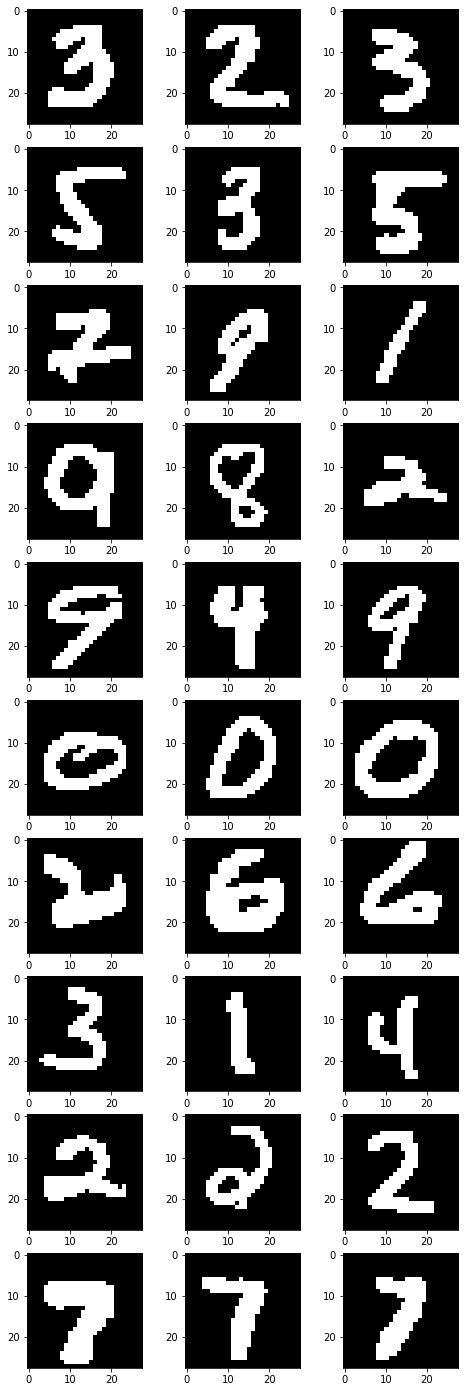

In [32]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(numbers_labeled_bin[i-1][secrets.choice(list(range(500)))].reshape(28,28), cmap = 'gray')

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(numbers_labeled[i-1][secrets.choice(list(range(500)))].reshape(28,28), cmap = 'gray')